In [4]:
import numpy as np
import matplotlib.pyplot as plt

### Задание 1


Формула нормализованной гауссовой функции со средним значением $\mu$ и стандартным отклонением $\sigma$:

$$
    g \left(x\right) = \dfrac{1}{\sigma \sqrt{2 \pi}} \exp \left(-\dfrac{\left(x - \mu \right)^2}{2 \sigma ^2}\right)
$$

Необходимо написать функцию, основанную на использовании массивов NumPy для вычисления гауссовых функций при $\mu = 0$ и $\sigma ^2 = 0.5; 1.0, 1.5$. Использовать сетку из $1000$ точек в интервале $−10 \leqslant x \leqslant 10$. Постройте графики данных функций.

In [5]:
def norm_gauss(
        x: float | np.ndarray,
        mu: float = 0.0,
        sigma: float = .5
) -> float | np.ndarray:
    g = 1 / (sigma * (2 * np.pi) ** .5) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))
    return g

In [6]:
def draw_plot(
        data: np.ndarray,
        sigmas: list[float] = [.5, .0, 1.5]
) -> None:
    fig, ax = plt.subplots()
    
    for i, d in enumerate(data):
        plt.plot(d, label=r'$\sigma = $' f'{sigmas[i]}')
    
    plt.legend()
    plt.tight_layout()
    plt.show()

    return

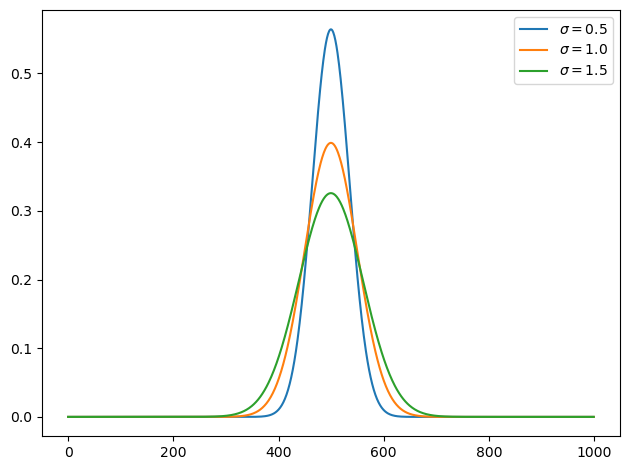

In [7]:
x = np.linspace(-10, 10, 1000)
sigma_list = np.array([.5, 1.0, 1.5])
results = np.zeros((sigma_list.shape[0], x.shape[0]))

for i, sigma in enumerate(sigma_list):
    results[i] = norm_gauss(x, sigma=sigma ** .5)

draw_plot(results, sigma_list)

### Задание 2

Уравнение Ван дер Ваальса, описывающее состояние газа, можно записать в виде следующей формулы как зависимость давления $p$ газа от его молярного объема $V$ и температуры $T$:

$$
    p = \dfrac{RT}{V-b} - \dfrac{a}{V^2}
$$

где $a$ и $b$ – специальные молекулярные константы, а $R = 8.314$ Дж / К∙моль – универсальная газовая константа. 

Формулу легко преобразовать для вычисления температуры по заданному давлению и объему, но ее форма, представляющая молярный объем в  отношении к  давлению и температуре, является кубическим уравнением:

$$
    pV^3 - \left(pb + RT\right)V^2 + aV - ab = 0
$$

Все три корня этого уравнения ниже критической точки ($T_c$, $p_c$) являются действительными: наибольший и наименьший соответствуют молярному объему
газообразной фазы и жидкой фазы соответственно. Выше критической точки,
где не существует жидкая фаза, только один корень является действительным
и  соответствует молярному объему газа (в этой области его также называют
сверхкритической жидкостью, или сверхкритической средой). 

Критическая точка определяется по условию $\left(\partial p/\partial V\right)_T = \left(\partial ^2 p/\partial V^2\right)_T = 0$ и для идеального газа Ван дер Ваальса выводятся формулы:

$$
    T_c = \dfrac{8a}{27Rb} \qquad p_c = \dfrac{a}{27b^2}
$$

Для $NH_3$ константы Ван дер Ваальса $a  = 4.225$ $л^2 \cdot бар/моль^2$ и $b = 0.03707 \space л/моль$.

- Найти критическую точку для аммиака, затем определить молярный объем при комнатной температуре и давлении ($298$ К, $1$ атм) и при следующих словиях ($500$ К, $12$ МПа).
- Изотерма – это множество точек ($p$, $V$) при постоянной температуре, соответствующее уравнению состояния газа. Построить изотерму ($p$ в зависимости от $V$) для аммиака при температуре $350$ К, используя уравнение Ван дер Ваальса, и сравнить ее с изотермой при температуре $350$ К для идеального газа, уравнение состояния которого имеет <br> вид $p = RT/V$.

In [27]:
from scipy.constants import R
import matplotlib.pyplot as plt

Polynomial = np.polynomial.Polynomial

In [9]:
def calculate_tc(a: float, b: float, r: float) -> float:
    return 8 * a / (27 * r * b)


def calculate_pc(a: float, b: float) -> float:
    return a / (27 * b ** 2)

In [20]:
def calculate_vm(
        t: float,
        p: float,
        a: float,
        b: float,
        r: float,
        which_root: str = 'max'
) -> float | None:
    if which_root not in ('max', 'min'):
        print('which_root parameter must be "min" or "max"')
        return
    
    foo = np.max if set(which_root) == 'max' else np.min

    tc = calculate_tc(a, b, r=r)
    pc = calculate_pc(a, b)

    poly = Polynomial(
        (
            -a * b,
            a, 
            -(p * b + r * t),
            p
        )
    )

    roots = poly.roots()
    roots = roots[~np.iscomplex(roots)].real

    if t > tc and p > pc:
        r, = roots
        return r
    
    return foo(roots)

In [21]:
a, b = .4225, 37.07e-6
tc = calculate_tc(a=a, b=b, r=R)
pc = calculate_pc(a=a, b=b)
tc, pc

(406.1590784720662, 11387221.72551026)

In [22]:
t1, p1 = 298, 101325
vm1 = calculate_vm(t=t1, p=p1, a=a, b=b, r=R)
print(vm1)

t2, p2 = 500, 12e6
vm2 = calculate_vm(t=t2, p=p2, a=a, b=b, r=R)
print(vm2)

5.443465665498773e-05
0.00027154821991501186


In [50]:
count = 100
p_array = np.linspace(101_325, 1000_000, count)

v_vapor = np.zeros_like(p_array)
for j, p in enumerate(p_array):
    v_vapor[j] = calculate_vm(t=350, p=p, a=a, b=b, r=R)

In [51]:
v_vapor

array([0.0286116 , 0.02625014, 0.02424751, 0.02252768, 0.0210347 ,
       0.01972647, 0.0185707 , 0.01754219, 0.01662102, 0.01579123,
       0.01503986, 0.01435629, 0.01373174, 0.01315888, 0.01263156,
       0.01214455, 0.01169339, 0.01127427, 0.01088389, 0.0105194 ,
       0.01017829, 0.0098584 , 0.00955779, 0.00927479, 0.00900787,
       0.00875572, 0.00851714, 0.00829106, 0.00807652, 0.00787266,
       0.00767871, 0.00749396, 0.00731776, 0.00714955, 0.00698878,
       0.00683497, 0.00668769, 0.00654652, 0.00641109, 0.00628106,
       0.00615612, 0.00603596, 0.00592032, 0.00580895, 0.00570161,
       0.0055981 , 0.00549821, 0.00540175, 0.00530855, 0.00521845,
       0.00513129, 0.00504694, 0.00496525, 0.00488612, 0.0048094 ,
       0.00473501, 0.00466283, 0.00459277, 0.00452473, 0.00445863,
       0.00439439, 0.00433193, 0.00427117, 0.00421205, 0.00415451,
       0.00409847, 0.00404389, 0.0039907 , 0.00393885, 0.0038883 ,
       0.00383899, 0.00379088, 0.00374392, 0.00369809, 0.00365

In [52]:
v_mk = np.zeros_like(v_vapor)
for j, p in enumerate(p_array):
    v_mk[j] = R * 350 / p

In [53]:
v_mk

array([0.02872008, 0.02635865, 0.02435605, 0.02263625, 0.02114331,
       0.01983512, 0.01867937, 0.01765089, 0.01672976, 0.0159    ,
       0.01514866, 0.01446513, 0.01384061, 0.01326779, 0.0127405 ,
       0.01225352, 0.01180239, 0.01138331, 0.01099296, 0.0106285 ,
       0.01028743, 0.00996757, 0.009667  , 0.00938402, 0.00911715,
       0.00886503, 0.00862648, 0.00840043, 0.00818593, 0.00798211,
       0.00778819, 0.00760347, 0.00742731, 0.00725912, 0.00709839,
       0.00694462, 0.00679737, 0.00665623, 0.00652084, 0.00639085,
       0.00626593, 0.00614581, 0.0060302 , 0.00591887, 0.00581157,
       0.00570809, 0.00560823, 0.00551181, 0.00541864, 0.00532858,
       0.00524145, 0.00515714, 0.00507549, 0.00499638, 0.00491971,
       0.00484535, 0.0047732 , 0.00470318, 0.00463517, 0.00456911,
       0.0045049 , 0.00444248, 0.00438176, 0.00432267, 0.00426516,
       0.00420916, 0.00415461, 0.00410146, 0.00404965, 0.00399913,
       0.00394985, 0.00390178, 0.00385486, 0.00380906, 0.00376

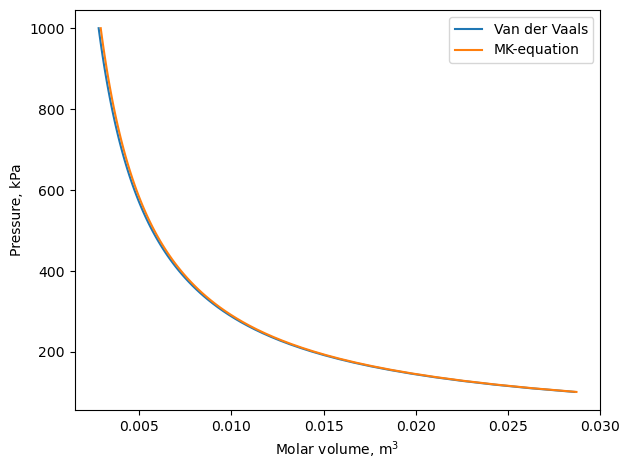

In [54]:
fig, ax = plt.subplots()

ax.plot(v_vapor, p_array / 1000, label='Van der Vaals')
ax.plot(v_mk, p_array / 1000, label='MK-equation')

ax.set_xlabel(r'Molar volume, m$^3$')
ax.set_ylabel('Pressure, kPa')

plt.legend()
plt.tight_layout()